In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from catalog_utils import region_lines_from_table
from astropy.table import Table

In [58]:
df = pd.read_csv("../TAP_1_J_MNRAS_3444_gc.csv")

In [59]:
df.columns

Index(['recno', 'T17ID', 'oldID', 'RAJ2000', 'DEJ2000', 'Prob', 'Rgc', 'PA',
       'umag', 'gmag', 'rmag', 'imag', 'zmag', 'e_umag', 's_umag', 'e_gmag',
       's_gmag', 'e_rmag', 's_rmag', 'e_imag', 's_imag', 'e_zmag', 's_zmag'],
      dtype='object')

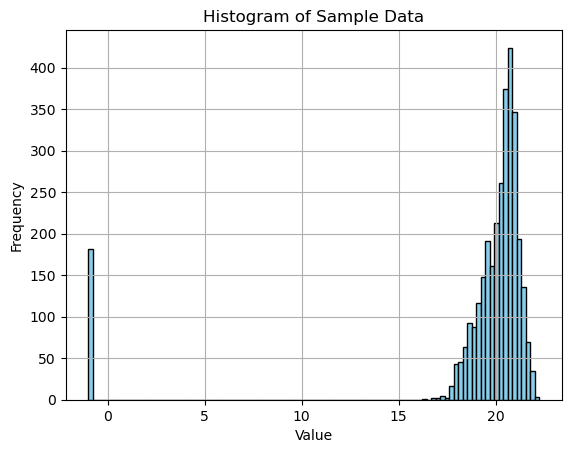

In [60]:
# See the distance of the SPLUS nad WISE source
# Plotting the histogram
plt.hist(df["rmag"], bins=100, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [61]:
print("Min value:", df["rmag"].min())
print("Max value:", df["rmag"].max())


Min value: -1.0
Max value: 22.26


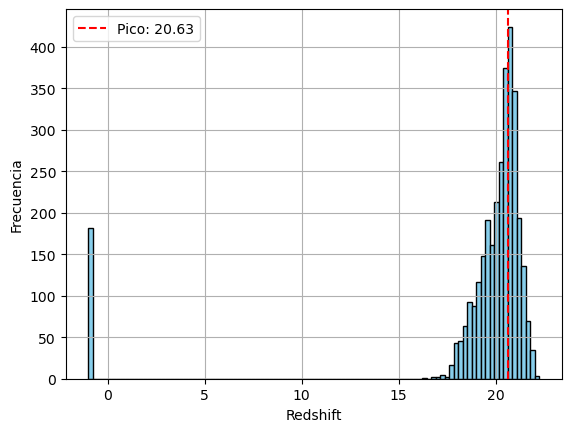

In [53]:
counts, bin_edges, _ = plt.hist(df["rmag"], bins=100, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_ = bin_edges[peak_index]
plt.axvline(x=peak_redshift, color='r', linestyle='--', label=f'Pico: {peak_:.2f}')
    
# Añadir título y etiquetas
# plt.title(f'Distribución de Redshift para {file}')
plt.xlabel('Redshift')
plt.ylabel('Frecuencia')
plt.grid(True)  # Añadir líneas de la cuadrícula para mejor legibilidad
plt.legend()

## Creemos un archivo REG con las coordenadas

In [62]:
regionfile = '../TAP_1_J_MNRAS_3444_gc.reg'
# Convert the Pandas DataFrame to an Astropy Table
t = Table.from_pandas(df)

In [64]:
with open(regionfile, 'w') as f:
    f.write('\n'.join(region_lines_from_table(t, name='T17ID', ra='RAJ2000', dec='DEJ2000', color='#44cc67')))